In [146]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Yogabar/Solution/data/add_review_data.csv')
df.shape

(880, 4)

## Remove duplicates from `df` :

In [147]:
df.sort_values("review_author", inplace=True)
df.drop_duplicates(keep = False, inplace = True)
df.shape

(860, 4)

In [148]:
df.sample(10)

,review_posted_date,review_header,review_rating,review_author
302,03 April 2019,Very Healthy breakfast,5.0,Sindhu
487,13 August 2020,Excellent,4.0,sai Siva panda
143,09 July 2019,Ok,3.0,shailendra
717,09 July 2020,Good product,4.0,Amazon Customer
177,17 March 2019,Perfect Start with healthy breakfast,5.0,Rahul Agrawal
863,05 August 2019,Loving it,5.0,Suchi
230,24 June 2020,not satisfied,1.0,Alka Thakur
641,22 June 2020,Soooper combination of nutrients,5.0,shajila
461,17 October 2019,Tasty healthy treat,5.0,drrajeshtr
625,12 August 2019,Nice,5.0,Jyoti Singh


## Converting `review_posted_date` to `datetime` object :

In [149]:
df['review_posted_date'] = pd.to_datetime(df['review_posted_date'])
df.dtypes

review_posted_date    datetime64[ns]
review_header                 object
review_rating                float64
review_author                 object
dtype: object

In [150]:
df['review_header'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

def remove_punct_emoji(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text.encode('ascii', 'ignore').decode('ascii')

df['review_header_punct'] = df['review_header'].apply(lambda x: remove_punct_emoji(x))

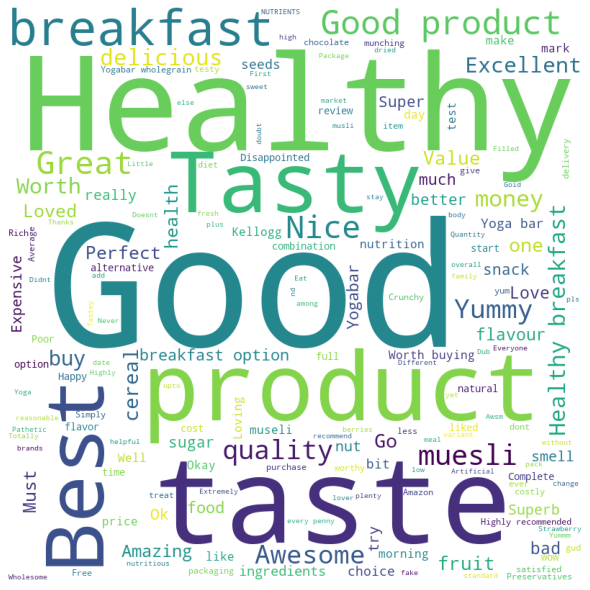

In [151]:
import nltk
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.corpus import stopwords

stopword = nltk.corpus.stopwords.words('english')

# Create Wordcloud strings
review_header = " ".join(review for review in df.review_header_punct)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopword, min_font_size = 10).generate(review_header) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [152]:
df_time = df.copy().reindex(columns=['review_rating','review_posted_date']) #create new dataframe storing only review date and rating
df_time.rename(columns = {'review_posted_date':'date', 'review_rating' : 'rating'}, inplace = True) #changing column values
df_time.to_csv("D:/Yogabar/Solution/data/rating_time_series.csv", index = False)

In [153]:
df_ts = pd.read_csv("D:/Yogabar/Solution/data/rating_time_series.csv" , parse_dates = ['date'], index_col = 'date')
df_ts.reset_index(inplace=True)

df_ts.sample(10)

,date,rating
121,2019-07-26,5.0
496,2019-10-06,5.0
305,2020-06-09,5.0
575,2020-06-20,5.0
244,2020-09-02,1.0
212,2020-06-20,4.0
715,2020-09-13,5.0
390,2020-07-19,4.0
494,2019-10-02,5.0
707,2020-06-14,5.0


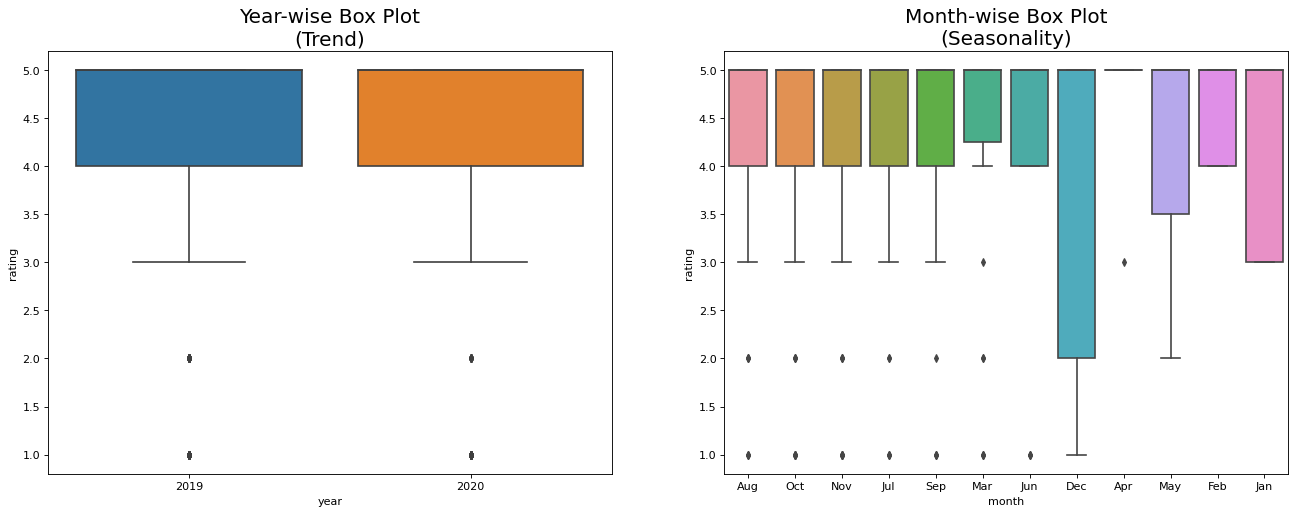

In [154]:
#prepare data
df_ts['year'] = [d.year for d in df_ts.date]
df_ts['month'] = [d.strftime('%b') for d in df_ts.date]
years = df_ts['year'].unique()

#construct lot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='rating', data=df_ts, ax=axes[0])
sns.boxplot(x='month', y='rating', data=df_ts.loc[~df_ts.year.isin([2018, 2020]), :])

#set title
axes[0].set_title('Year-wise Box Plot\n(Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(Seasonality)', fontsize=18)
plt.show()
